# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [32]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

from scipy import stats

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\301339\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


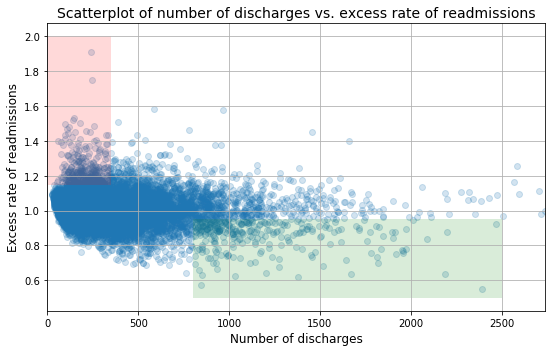

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

### A. Do you agree with the above analysis and recommendations? Why or why not?

At a glance, I am not sure I agree with the analysis provided. Although there are some areas of lower readmission rates at the high end of numbers of discharges, the data in this range is sparse and may have the same general distribution as in the lower range. Similarly in the low range of discharges the high values being referred to look suspiciously like outlier values, since they separate so far from the bulk of the data.

As for the recommendations, further analysis may allow for better suggestions, although incentives to have lower rates of readmissions seems like a sound recommendation regardless of what a further dive into the data may provide.

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

####    1. Setup an appropriate hypothesis test.

The null hypothesis for this dataset will be as follows:
    
    The rate of excessive readmissions for hospitals does not vary with respect to the number of discharges. i.e. Hospitals with more than 1000 discharges have the same readmission rate as those with less than 100 discharges and between 100-1000 discharges.
    
In order to test this hypothesis, the mean admission rate for each category will be compared.

####    2. Compute and report the observed significance value (or p-value).

In [11]:
(x1 > 100).sum()

10271

In [19]:
# Convert x and y values into Series
x1 = pd.Series(x)
y1 = pd.Series(y)

# Total entries
total_entries = len(x1)

print('Total Entries: ', total_entries)

# Entries per category
total_low = (x1 < 100).sum()
total_med = (x1 < 1000).sum() - (x1 < 100).sum()
total_high = (x1 >= 1000).sum()

frac_low = total_low / total_entries
frac_med = total_med / total_entries
frac_high = total_high / total_entries

print('# of entries with less than 100 discharges: ',total_low)
print('# of entries with 100-1000 discharges: ',total_med)
print('# of entries with more than 1000 discharges: ',total_high)

print('fraction of entries with less than 100 discharges: ',frac_low)
print('fraction of entries with 100-1000 discharges: ',frac_med)
print('fraction of entries with more than 1000 discharges: ',frac_high)

Total Entries:  11494
# of entries with less than 100 discharges:  1188
# of entries with 100-1000 discharges:  9845
# of entries with more than 1000 discharges:  461
fraction of entries with less than 100 discharges:  0.103358273882
fraction of entries with 100-1000 discharges:  0.856533843745
fraction of entries with more than 1000 discharges:  0.0401078823734


In [29]:
# average readmission rate
total_readm = np.mean(y1)

# readmission rate standard deviation
readm_std = np.std(y1)

print('Average rate of readmission for all entries: {0:0.4f}'.format(total_readm))

# readmission rates vs. discharge category
readm_low = np.mean(y1[x1 < 100])
readm_med = np.mean(y1[(x1 > 100) & (x1 < 1000)])
readm_high = np.mean(y1[x1 >= 1000])

print('Average rate of readmission for hospitals with less than 100 discharges: {0:0.2f} %'.format(readm_low))
print('Average rate of readmission for hospitals with between 100 and 1000 discharges: {0:0.2f} %'.format(readm_med))
print('Average rate of readmission for hospitals with more than 1000 discharges: {0:0.2f} %'.format(readm_high))

Average rate of readmission for all entries: 1.0075
Average rate of readmission for hospitals with less than 100 discharges: 1.02 %
Average rate of readmission for hospitals with between 100 and 1000 discharges: 1.01 %
Average rate of readmission for hospitals with more than 1000 discharges: 0.98 %


In [30]:
# Calculate Margin of Error
error = readm_std/np.sqrt(len(y1))
print('Margin of Error: {0:0.4f}'.format(error))
print('Confidence Interval for total average readmission rates: between {0:0.4f} and {1:0.4f}'.format(total_readm-error, total_readm+error))

Margin of Error: 0.0009
Confidence Interval for total average readmission rates: between 1.0067 and 1.0084


In [37]:
# Compute Z score and corresponding p-value
z_score_low = abs(readm_low - total_readm)/error
z_score_med = abs(readm_med - total_readm)/error
z_score_high = abs(readm_high - total_readm)/error

p_value_low = 2*(1-stats.norm.cdf(z_score_low))
p_value_med = 2*(1-stats.norm.cdf(z_score_med))
p_value_high = 2*(1-stats.norm.cdf(z_score_high))

print('p value via proportion comparison test: {0}'.format(p_value_low))
print('p value via proportion comparison test: {0}'.format(p_value_med))
print('p value via proportion comparison test: {0}'.format(p_value_high))

p value via proportion comparison test: 0.0
p value via proportion comparison test: 0.5789624518899101
p value via proportion comparison test: 0.0


####    3. Report statistical significance for $\alpha$ = .01. 

The calculations above show that the ranges of hospital discharge does indeed influence the rate of readmissions, as suggested in the given analysis, beyond the statistical significance of alpha = 0.01 for the low and high ranges.

####    4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Although there is a statistical significance here, it may not signify a practical significance from which suggestions can be based. Smaller hospitals may not have the real estate or resources necessary to give patients the quality or length of care needed to avoid readmission within reason. More analysis would be needed, maybe with information on duration and categories of cases in order to form improved suggestions to increase performance for the small hospitals.

####   5. Look at the scatterplot above. 

While the scatterplot does offer a lot of granularity in details to look at trends in the data, the density of data makes it a bit complex to immediately draw conclusions for the audience. A plot that might work well would be one that incorporates the ratio of readmissions to discharges, as shown below:

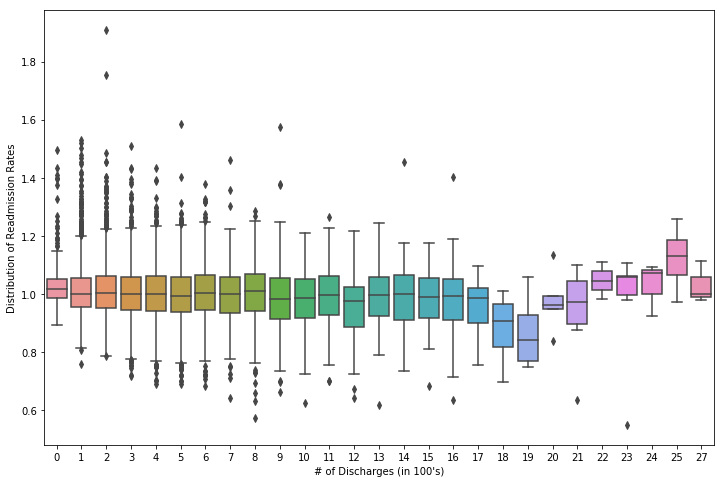

In [63]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
import seaborn as sns

readm_bins_x = []
readm_bins_y = []

for i in range(len(x1)):
    readm_bins_x.append(x[i] // 100)
    readm_bins_y.append(y[i])     


plt.subplots(figsize=(12,8))
sns.boxplot(readm_bins_x, readm_bins_y)

plt.xlabel("# of Discharges (in 100's)")
plt.ylabel('Distribution of Readmission Rates')

plt.show()